In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Cost Functions

Cost functions are a measurement of the performance of the model. To find a model that best fits the data, use a cost function. Minimizing the cost function lends to better models, as a low cost would imply that the predictions are not far from the actual values. In the following section, we will see how making small tweaks to parameters of the model with the goal of minimizing the cost outputs a model that fits to the data well.

Two such cost functions are **residual sum of squares (RSS)** and **mean squared error (MSE)**.

## Residual Sum of Squares (RSS)

**RSS** is a measure of the discrepancy, or error, between the data and function modelling the data.

**RSS** is the **sum of squared residuals** (or sum of squared error). 

$$RSS = \sum_{i=1}^{n}(y_i - f(x_i))^2$$

![image](https://user-images.githubusercontent.com/7232635/44668546-b9896c80-a9eb-11e8-9b81-510eb68ecc19.png)

A **residual**, $r$ is the distance between $y_{observed}$ and $y_{predicted}$

$$r_i = y_{observed} - y_{predicted} = y_i - f(x_i)$$

### Why Square the Error in RSS

Squaring the error provides **nicer mathematical properties** when it comes **minimizing a cost function**. When minimizing a function, taking a **derivative** (or **gradient**) should come to mind. Taking a derivative of a **squared error** is a lot more friendly than a derivative of the **absolute value** of the error. A squared error is continuously differentiable (differentiable everywhere), whereas the absolute error is not continuously differentiable, since its derivative is undefined at $0$.

**The absolute value of the error is not differentiable at 0:**
![image](https://user-images.githubusercontent.com/7232635/44669524-15ed8b80-a9ee-11e8-8179-9e7e2ff63668.png)

**WARNING:** Squared error punishes outliers heavily. This means that the outliers may end up dominating the error. For example, you could have a set of residuals, $R = [0.1, 0.4, 20, 0.3, 0.1]$. Though 4 of the residuals are very small, the one outlier $20$ will make the error very large, even though the function may model the values well apart from the single outlier.


## Mean Squared Error (MSE) (L2 Loss) (Quadratic Loss)

**MSE** is one of the most commonly used loss functions for regression. **MSE** is the average of the sum of square errors. **MSE** is proportional to **RSS**, since **MSE** is **RSS** divided by the total number of samples, $N$. $N$ can also be considered as the **number of degrees of freedom**.

$$MSE = \frac{1}{N}RSS  = \frac{1}{N}\sum(r_i)^2 = \frac{1}{N}\sum(y_i - f(x_i))^2$$

![image](https://user-images.githubusercontent.com/7232635/44684599-7a711080-aa17-11e8-815e-4b62971268b4.png)

## Mean Absolute Error (MAE) (L1 Loss)

$$MAE = \sum_{i=1}^{n}\frac{|(y_i - x_i)|}{n}$$

![image](https://user-images.githubusercontent.com/7232635/44684691-b73d0780-aa17-11e8-866d-9e3f0d6b8bf7.png)

## Summary

| MSE | MAE |
|:----|:----|
| squared error is easier to solve | absolute error is harder to solve |
| less robust to outliers | more robust to outliers |

# Gradient Descent

Gradient descent is an **optimization algorithm** used to **minimize** some cost function by **iteratively** moving in the **direction of steepest descent** as defined by the **negative of the gradient**. At each iteration, **theta** (the vector of coefficients of the model function) will be updated.

The theta update is captured by subtracting the **learning rate**, _alpha_, multiplied by the **gradient of the cost function**, $J$:

$\alpha = $ learning rate

$J(\theta)$ = cost function

$$\theta := \theta - \alpha * \frac{\partial}{\partial \theta_j} J(\theta) $$

![image](https://user-images.githubusercontent.com/7232635/44599603-e13ac380-a7a4-11e8-8e91-2b3cba9d231f.png)

(In the diagram above, you can think of the **initial weight** as the initial $\theta$ or coefficients in $f(x)$)

## Deriving the Gradient Descent Algorithm

Choose a cost function, $J$, to minimize. For this derivation let's use another cost function called the **least mean squares (LMS) cost function**.

$$LMS = J(\theta) = \frac{1}{2}\sum_{i=1}^{N}(f(x_i) - y_i)^2$$

Suppose we have a **single training example** to remove the summation of the $N$ training examples and make the derivative more clear. Since we want to minimize this cost function, we will take its derivative:

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{\partial}{\partial\theta_j}\frac{1}{2}(f(x) - y)^2$$

Using the **chain rule**:

$$ = 2 * \frac{1}{2}(f(x) - y) * \frac{\partial}{\partial\theta_j}(f(x) - y) $$

Sub in $\sum_{i=1}^{N}\theta_i \cdot x_i$ for $f(x)$, since $f(x) = \theta_0' + \theta_1' \cdot x_1 + ... + \theta_N' \cdot x_N $:

$$ = (f(x) - y) \cdot \frac{\partial}{\partial\theta_j}(\theta_0 + \sum_{i=1}^{N}\theta_i' \cdot x_i - y) $$

$$ = (f(x) - y) \cdot x_j $$

Now, that we know the derivative for a single training example, we can make an update to **theta** for a **single training example**:

$$ \theta_j := \theta_j - \alpha \cdot (f(x) - y) \cdot x_j$$

Now, let's modify the theta update so that it can work for **multiple training examples** by reintroducing the summation:

$$ \theta_0 := \theta_0 - \alpha \sum_{i=1}^{N} (f(x_i) - y_i) $$
$$ \theta_j := \theta_j - \alpha \sum_{i=1}^{N} (f(x_i) - y_i) \cdot x_j$$

**Notice that $\theta_0$'s cost gradient is different and does not include a dot product with $x_j$.** This is because our function, $f(x)$, we are using as our model is represented by: $f(x) = \theta_0 + \theta_1' \cdot x_1 + ... + \theta_N' \cdot x_N $

## Gradient Descent Algorithm Summary

Choose an initial $\theta$ (see **Choosing Parameters for Gradient Descent** section for more details)

`while (current epoch < max epochs):` 
    
    # Update theta according to: 
    
    $ \theta_j := \theta_j + \alpha \cdot \sum_{i=1}^{N}(y_i - f(x_i)) \cdot x_j $

## Choosing Parameters for Gradient Descent

### Initializing Theta

How you choose $\theta$ depends on whether or not you **normalized** your data before performing gradient descent.

| Normalized Data | Non-Normalized Data |
|:--------------- |:--------------------|
| initialize theta to **zeros** as data is normalized around **0** | must pick a **smart starting point** for $\theta$ close to where you think the optimum is (which may not be around 0) |
| will take less steps to converge | will take more steps to converge |

#### Example

Suppose your data is **normalized** by performing **minmax normalization** (see below for formula) so that the data are in the set $[0, 1]$. Suppose $X = [[0.5], [-0.25], [0.75]], y = [[0.1], [0.2], [-0.3]]$. 

It's known that $dim(X) = (3, 1)$. $X$ has $3$ **rows** and $1$ **feature**. 

Given this information, we should initialize theta such that $dim(\theta) = (len(features) + 1, 1) = (2, 1)$. 

Therefore, $\theta_{initial} = [[0.], [0.]]$

#### [Feature Scaling before Theta Initialization](https://en.wikipedia.org/wiki/Feature_scaling)

One example of **feature scaling** is **MinMax Normalization**.

**MinMax Normalization:** 

$$X' = \frac{X - X_min}{X_max - X_min}$$

#### Importance of Normalization

[Normalizing features](https://en.wikipedia.org/wiki/Feature_scaling) before performing gradient descent is important, since it will allow for `faster convergence`.

![image](https://user-images.githubusercontent.com/7232635/44600279-cec18980-a7a6-11e8-84af-1a30169f0f62.png)

### Learning Rate

Too high a learning rate and gradient descent will **diverge**, too low a learning rate and gradient descent will take an **extremely long time to converge**.

![image](https://user-images.githubusercontent.com/7232635/44600184-81ddb300-a7a6-11e8-9fc8-b14ea0f0ccb4.png)

Typically, you would select a learning rate in the range $[0.1, 0.00001]$.

# Gradient Descent Example

Recall, the **MSE** cost function can be represented as:

$$ J(\theta) = \frac{1}{N}\sum_{i=1}^{N}(f(x_i) - y_i)^2$$

where:

* $N$ is the number of training examples
* $x_i$ is the input vector for the `ith` training example
* $y_i$ is the class label of the `ith` training example
* $\theta$ is the chosen parameter values (or weights), i.e. ($\theta_0$, $\theta_1$, ... $\theta_N$)
* $f(x_i)$ is the prediction for the `ith` training example using the parameters $\theta$

When performing gradient descent, we will need to compute the **gradient of the cost function**, $J_{grad}$:

**Note:** By convention, $\theta$ is written as a **column vector**, hence the need to transpose it before taking the dot product with $X$

$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i $$

Suppose we are given the below data and are asked to perform gradient descent using the **MSE Cost Function**:

# TODO convert to matrix form
```
X = np.array([[1], [2], [4], [3], [5]])
y = np.array([[1], [3], [3], [2], [5]])
```

Before going into the code, let's break down what $ \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i $  represents. This equation can be represented as a system of linear equations, so we can rewrite this expression using only  matrices. 

Let:

$M$ be the number of training examples (or rows in $X$)

$N$ be the number of features (or columns in $X$)

$X$ be a $M x N$ matrix

$Y$ be a $M x 1$ matrix

$\theta$ be a $ (N+1) x 1 $ matrix

So...

$X$ = $\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1N} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2N} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{M1}  & x_{M2} & x_{M3} & \dots & x_{MN}
\end{bmatrix}$ a $M x N$ matrix

$Y$ = $\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{M} \\
\end{bmatrix}$ a $M x 1$ matrix

$\theta$ = $\begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \vdots \\
    \theta_{N} \\
\end{bmatrix}$ a $(N+1) x 1$ matrix

The summation is really just a dot product, so we can represent the cost function as: $\frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$ Let's analyze how we reached this equation from the summation expression step by step.

Before we begin translating the summation expression to a matrix expression, we need to address how we can handle the $ X \cdot \theta $ part. Notice that the dimensions of $X$ and $\theta$ do not match, since there's an extra $\theta_0$ in $\theta$. This $\theta_0$ should not multiplied by any $X$ value, so we should fix the dimension mismatch problem by adding a column of ones to $X$:

$X$ = $\begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots & x_{1N} \\
    1 & x_{21} & x_{22} & x_{23} & \dots & x_{2N} \\
    1 & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{M1}  & x_{M2} & x_{M3} & \dots & x_{MN}
\end{bmatrix}$ a $M x (N+1)$ matrix

**Step 1:** Now, we can start by solving the $ X \cdot \theta $ part of the equation. Notice that the first term in each linear equation is the $\theta_0$'s. This was possible by adding the column of 1's to $X$ before performing the dot product:

$X \cdot \theta$ = $\begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN}
\end{bmatrix}$ a $M x 1$ matrix

**Step 2:** Next, subtract Y:

$X \cdot \theta - Y$ = $\begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} - y_{1} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} - y_{2} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN} - y_{M}
\end{bmatrix}$ a $M x 1$ matrix

**Step 3:** Now take the dot product of that result transposed with $X$ and multiply the resulting product by the coefficient $\frac{2}{N}$:

$\frac{2}{N} [X' \cdot (X \cdot \theta - Y)] = \frac{2}{N} \begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots & x_{1N} \\
    1 & x_{21} & x_{22} & x_{23} & \dots & x_{2N} \\
    1 & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{M1}  & x_{M2} & x_{M3} & \dots & x_{MN}
\end{bmatrix}' \cdot \begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} - y_{1} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} - y_{2} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN} - y_{M}
\end{bmatrix} $ a $(N+1) x 1$ matrix

The final dimension $(N+1) x 1$ is desired as it is the same dimension as $\theta$, so we can use this value to update $\theta$ to move along the direction of the gradient.

Therefore, 

$$grad_J(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$$

In the implementation below, you should see this exact implementation in the **cost_gradient** function with the corresponding steps 1, 2, and 3 labeled in the comments.

**Note:** If the order of the **transpose** for the summation's $\theta'x$ and the matrices version $X\theta$ is confusing, see [this post](https://math.stackexchange.com/questions/1478128/for-linear-regression-compute-theta-t-x). The reason for the difference in order and transpose is due to the former dealing with a **single training example** and the latter dealing with **a matrix of training examples**.

## Dataset

In [2]:
train_X = np.array([[1], [2], [4], [3], [5]])
train_y = np.array([[1], [3], [3], [2], [5]])

## Plot of the Data

The data appear to be following a linear trend.

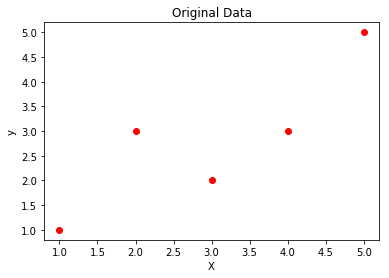

In [3]:
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(train_X, train_y, 'ro')

## Normalize the Data Before Gradient Descent

Do MinMax Normalization on the data so that it falls within $[0, 1]$. This will allow for faster convergence.

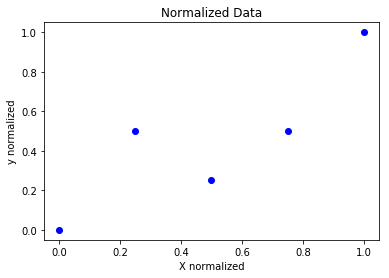

In [4]:
# normalize features between [0, 1]
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

X_norm = normalize(train_X)
y_norm = normalize(train_y)
plt.title('Normalized Data')
plt.xlabel('X normalized')
plt.ylabel('y normalized')
plt.plot(X_norm, y_norm, 'bo')

In [5]:
X_norm

array([[ 0.  ],
       [ 0.25],
       [ 0.75],
       [ 0.5 ],
       [ 1.  ]])

## Data Preparation

Concatenate a column of ones to X so that we can easily take the dot product for $X\theta$

In [6]:
# prepare X by concatenating a column of rows
column_of_ones = np.ones((len(y_norm), 1))
X_norm = np.concatenate((column_of_ones, X_norm), axis=1)
X_norm

array([[ 1.  ,  0.  ],
       [ 1.  ,  0.25],
       [ 1.  ,  0.75],
       [ 1.  ,  0.5 ],
       [ 1.  ,  1.  ]])

In [7]:
X_norm.shape

(5, 2)

In [8]:
y_norm.shape

(5, 1)

## Initialize Theta

$\theta$ was initialized to zeros as the data were normalized.

In [16]:
# theta is number of features + 1 (the +1 is for the intercept)
theta = np.zeros((X_norm.shape[1], 1))
theta.shape

(2, 1)

## Gradient Descent Implementation

In [17]:
def cost(X, y, theta):
    m = len(y)
    hypothesis = np.dot(X, theta)
    error = hypothesis - y
    return (1.0 / m) * np.sum(error**2)

def cost_gradient(X, y, theta):
    m = len(y)
    hypothesis = np.dot(X, theta)         # step 1
    error = hypothesis - y                # step 2
    return (2.0 / m) * np.dot(X.T, error) # step 3

def gradient_descent(max_epochs, tolerance, X, y, theta, learning_rate):
    costs = []
    curr_epoch = 0
    while (curr_epoch < max_epochs):
        # update theta
        theta = theta - learning_rate * cost_gradient(X, y, theta)
        
        # update cost
        J = cost(X, y, theta)
        
        if curr_epoch % 10 == 0:
            costs.append(J)
                
        curr_epoch += 1
    return theta, costs

max_epochs = 2000
tolerance = 0.001
learning_rate = 0.01
final_theta, costs = gradient_descent(max_epochs, tolerance, X_norm, y_norm, theta, learning_rate)

print(final_theta)
print(final_theta.shape)

[[ 0.05650421]
 [ 0.7882648 ]]
(2, 1)


## Convergence with Different Learning Rates

### Constant Learning Rate

Use the same learning rate throughout as you attempt to reach the optimum.

### Exponential Decay

Start with a high learning rate in the beginning epochs, and lower the learning rate exponentially as you attempt to reach the optimum.

`Let learning rate =` $lr$

$$ lr = lr_0 * e^{−kt} $$

## Analyzing How Learning Rates Affect Error

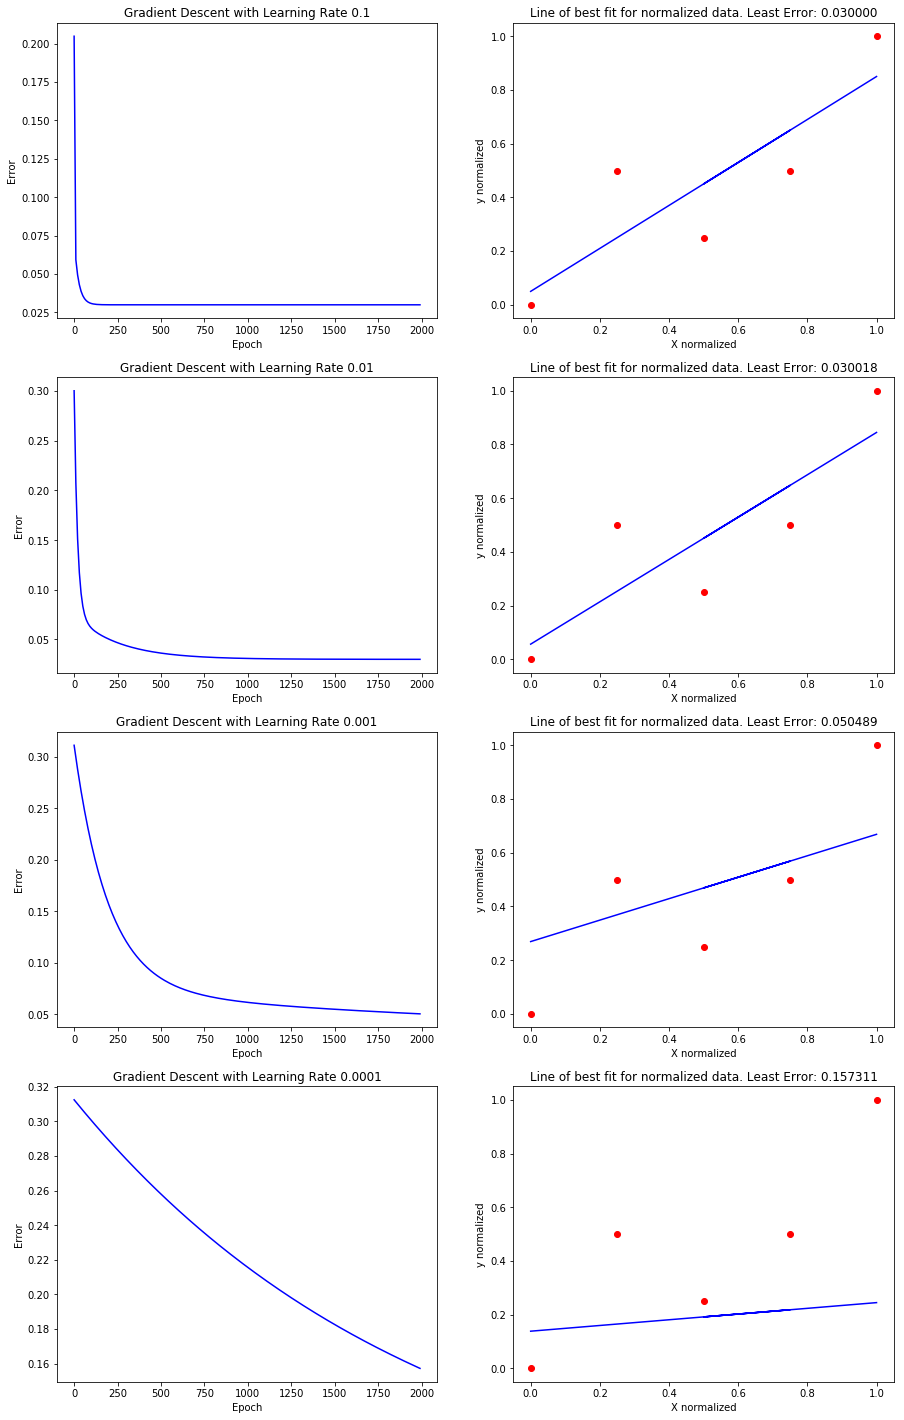

In [11]:
max_epochs = 2000
tolerance = 0.001
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = [ epoch for epoch in range(max_epochs) if (epoch % 10 == 0)]

fig, axes = plt.subplots(len(learning_rates), 2, figsize=(15, 25))

for i, learning_rate in enumerate(learning_rates):
    final_theta, costs = gradient_descent(max_epochs, tolerance, X_norm, y_norm, theta, learning_rate)
    
    axes[i][0].set_title('Gradient Descent with Learning Rate {}'.format(learning_rate))
    axes[i][0].set_xlabel('Epoch')
    axes[i][0].set_ylabel('Error')
    axes[i][0].plot(epochs, costs, 'b')
    
    least_cost = costs[-1]
    axes[i][1].set_title(f'Line of best fit for normalized data. Least Error: {least_cost:.6f}'.format(least_cost))
    axes[i][1].set_xlabel('X normalized')
    axes[i][1].set_ylabel('y normalized')
    axes[i][1].plot(X_norm[:, 1], y_norm, 'ro', X_norm[:, 1], np.dot(X_norm, final_theta), 'b')

From the plot aboves, a high learning rate of $0.1$ lends to fast convergence and the least amount of error, $0.030000$. Less epochs would be needed for the $0.1$ learning rate, as the error flattens out at less than $250$ epochs. In contrast, a low learning rate of $0.0001$ has slower convergence and would need more than $2000$ epochs to attain a similar low error to the $0.1$ learning rate.

### Limitations of Gradient Descent

* Only works for problems which have a `well-defined convex optimization` problem 
* Does poorly with `non-convex` and `non-strongly convex` optimization problems
* Suffers with `saddle points` and multiple local minima

#### Well-Defined Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543527-c6514c00-a6dd-11e8-894d-5c5ec6396c4a.png)

#### Non-Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543469-9bff8e80-a6dd-11e8-86e9-72f46df21ee6.png)

#### Non-Strongly Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543891-d4ec3300-a6de-11e8-931e-49b39ddbf2de.png)

#### Saddle Point

![image](https://user-images.githubusercontent.com/7232635/44543643-1d572100-a6de-11e8-9826-28bcca8ca6b5.png)


# Resources

* [Andrew Ng's Lecture Material](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

End of stuff for now

![image](https://user-images.githubusercontent.com/7232635/44798661-13bb3680-ab80-11e8-8f0e-6f8cc2bb6c45.png)


The normalization of the data makes it so the y-intercept of the best fit is around 0.0. Otherwise, you could have a y-intercept thousands of units off of the starting guess, and you'd have to trek there before you ever really started the optimization part.The normalization of the data makes it so the y-intercept of the best fit is around 0.0. Otherwise, you could have a y-intercept thousands of units off of the starting guess, and you'd have to trek there before you ever really started the optimization part.

No, absolutely not, but if you don't normalize, you should pick a starting point more intelligently (you're starting at (m,b) = (0,0)). Your learnrate may also be too small if you don't normalize your data, and same with your tolerance.

For a well-formed problem, if you're in fact diverging it often means your step size is too large. Try lowering it.

If it's simply not converging before it hits the max iterations, that could be a few issues:

Your step size is too small,
Your tolerance is too small,
Your max iterations is too small,
Your starting point is poorly chosen

https://stackoverflow.com/questions/10479353/gradient-descent-seems-to-fail

variations of gradient descent:
batch
stochastic (sgd)
mini-batch

## Regularization

* pushes coefficients of the polynomial to 0 to make the polynomial simpler
* to prevent overfitting
* Ridge Regression, Lasso

## Ridge (L2) Regression

* `discourages` learning a more `complex` model, so as to `avoid` the risk of `overfitting`
* good for polynomials, continuous functions, and normal distributions

### λ
* shrinkage parameter
* controls the size of the coefficients
* controls amount of regularization
* λ ↓ 0, we obtain the least squares solutions
* λ ↑ ∞, we get an intercept-only model

![image](https://user-images.githubusercontent.com/7232635/44366487-d62d1e00-a49a-11e8-8502-c5ceea47d925.png)

## Stochastic Gradient Descent
* fits points to lines
* `optimization` algorithm to find a good set of model `parameters` given a training dataset
* `iterative` algorithm and evaluates and updates the `coefficients` every iteration to `minimize` the `error` of a model on its training data

### Required Parameters for SGD
* **Learning Rate** - to limit the amount each coefficient is corrected on each update
* **Epochs** - number of times to run through the training data while updating the coefficients

### Update to Coefficients

![image](https://user-images.githubusercontent.com/7232635/44360541-2307f900-a489-11e8-99a3-88e6e014df8f.png)

![image](https://user-images.githubusercontent.com/7232635/44360561-387d2300-a489-11e8-8a40-c0ab31bc77fc.png)


## Gradient Descent vs Stochastic Gradient Descent

| Gradient Descent | Stochastic Gradient Descent |
|:-----------------|:----------------------------|
| When the dataset is large, calculating the parameters is `expensive`. Consider a dataset of `1 billion sample points`. Gradient descent would go through all 1 billion sample points on each epoch to calculate the parameters. | |

In [12]:
from IPython.display import Image
Image(url='https://www.jeremyjordan.me/content/images/2018/01/opt1.gif')

## Gradient Descent on Multiple Variables

Use the `transcoding_measurement.tsv` to predict `video transcoding time` for `MPEG` encoded videos. 

To follow along, read the [associated paper](https://ieeexplore.ieee.org/abstract/document/6890256/) which goes over their steps for this problem.

* [Dataset here](http://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset)

In [13]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
input_video_df = pd.read_csv('./transcoding_measurement.tsv', sep='\t')
output_video_df = pd.read_csv('./youtube_videos.tsv', sep='\t')

FileNotFoundError: File b'./transcoding_measurement.tsv' does not exist

## Input Video (MPEG)

In [ ]:
input_video_df.head()

In [ ]:
input_video_df.columns

## Output Decoded Video

In [ ]:
output_video_df.head()

## Select Features for Gradient Descent on Multiple Variables

In the paper, they selected these features:

### From input video

* bitrate
* framerate
* resolution
* codec
* number of i frames
* number of p frames
* number of b frames
* size of i frames
* size of p frames
* size of b frames 

### From output video

* desired bitrate
* framerate
* resolution
* codec

### Predict

* transcoding rate - measured in frames per second (fps) is defined as the number of frames transcoded per unit time (sec). Higher transcoding rate indicates better throughput, reduced delay and total cost of the system

### Description of Features

* id = Youtube video id 
* duration = duration of video 
* bitrate bitrate(video) = video bitrate 
* height = height of video in pixles 
* width = width of video in pixles 
* frame rate = actual video frame rate 
* frame rate(est.) = estimated video frame rate 
* codec = coding standard used for the video 
* category = YouTube video category 
* url = direct link to video (has expiration date) 
* i = number of i frames in the video 
* p = number of p frames in the video 
* b = number of b frames in the video 
* frames = number of frames in video 
* i_size = total size in byte of i videos 
* p_size = total size in byte of p videos 
* b_size = total size in byte of b videos 
* size = total size of video 
* o_codec = output codec used for transcoding 
* o_bitrate = output bitrate used for transcoding 
* o_framerate = output framerate used for transcoding 
* o_width = output width in pixel used for transcoding 
* o_height = output height used in pixel for transcoding 
* umem = total codec allocated memory for transcoding 
* utime = total transcoding time for transcoding

## Extract Features

In [ ]:
# let height = resolution

input_video_df_filtered = input_video_df[['bitrate', 'framerate', 'height', 'codec', 'i', 'p', 'b', 'i_size', 'p_size', 
                                          'b_size']]
output_video_df_filtered = output_video_df[['bitrate', 'frame rate', 'height', 'codec']]

In [ ]:
input_video_df_filtered.head()

In [ ]:
output_video_df_filtered.head()

## Give Features Friendlier Names

In [ ]:
input_video_df_filtered = input_video_df_filtered.rename(index=str, columns={"bitrate": "input_bitrate", 
                                                                             "framerate": "input_framerate", 
                                                                             "height": "input_resolution", "codec": "input_codec"})
output_video_df_filtered = output_video_df_filtered.rename(index=str, columns={"bitrate": "output_bitrate", "frame rate": "output_framerate", "height": "output_resolution", "codec": "output_codec"})

In [ ]:
input_video_df_filtered.head()

In [ ]:
output_video_df_filtered.head()

## Create X and y DataFrames

In [ ]:
X = input_video_df_filtered.join(output_video_df_filtered)
y = input_video_df[['utime']]

In [ ]:
X.head()